In [20]:
import pickle
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import pandas as pd

In [21]:
with open('./data/test.pkl', 'rb') as f:
    test_data = pickle.load(f)

In [22]:
test_data=np.array(test_data)
test_x=test_data[:,0]
test_y=test_data[:,1]


In [23]:
with open('./data/train.pkl', 'rb') as f2:
    train_data = pickle.load(f2)

In [24]:
train_data = np.array(train_data)
np.random.default_rng().shuffle(train_data)
train_x=train_data[:,0]
train_y=train_data[:,1]
train_x=np.array(np.array_split(train_x,10))
train_y=np.array(np.array_split(train_y,10))
bias=[]
vari=[]
err=[]
ierr=[]

In [25]:
# outputs
output=[]
#loop through degrees
for degree in range(1,21):
    # loop through models
    output.append([])
    for i in range(10):
        x_train = PolynomialFeatures(degree=degree).fit_transform(train_x[i].reshape(-1,1))
        x_test = PolynomialFeatures(degree=degree).fit_transform(test_x.reshape(-1,1))
        curr_model = LinearRegression().fit(x_train,train_y[i])
        output[degree-1].append(curr_model.predict(x_test))

In [26]:
def bias_var():
    global bias
    global vari
    global err
    bias=[]
    vari=[]
    err=[]
    ierr=[]
    for degree in range(1,21):
        output_curr_degree= output[degree-1]
        output_curr_degree=np.array(output_curr_degree)
        mean_point_over_10 = np.mean(output_curr_degree, axis = 0)
        bias.append(np.mean((mean_point_over_10 - test_y)))
        var_point_over_10 = np.var(output_curr_degree, axis = 0)
        vari.append(np.mean(var_point_over_10))
        err_a= np.array(output_curr_degree)-np.array(test_y)
        err_a=np.square(err_a)
        err_mean = np.mean(err_a, axis=0)
        err.append(np.mean(err_mean))
        ierr.append(np.mean(err_mean-(mean_point_over_10 - test_y)**2-var_point_over_10))
        
    table = pd.DataFrame({"Degree":np.array(range(1,21)),"Bias": bias,"Bias Square": np.array(bias)**2 ,"Variance": vari, "Mean Squared Error": err, "Irreducible Error": ierr})
    print(table.to_string(index=False))
    return table
        
    
    
    

In [27]:
table = bias_var()

 Degree        Bias   Bias Square       Variance  Mean Squared Error  Irreducible Error
      1  233.433988  54491.426573   41787.388228        1.045960e+06       3.369678e-11
      2  228.473470  52200.126482   64840.159504        1.022135e+06      -7.153176e-11
      3  -10.256440    105.194563   59674.030552        6.715188e+04       1.277840e-11
      4   -5.172233     26.751995   79551.905562        8.683603e+04      -7.457857e-12
      5   -2.813430      7.915389  104461.016964        1.115417e+05      -3.183231e-12
      6   -2.244034      5.035687  142124.269343        1.487611e+05      -6.275513e-12
      7   10.620676    112.798756  189365.164655        2.007345e+05      -1.118678e-11
      8    5.518378     30.452494  213896.602523        2.247409e+05       7.730705e-12
      9    3.406682     11.605482  222969.406302        2.343014e+05      -3.001333e-12
     10    3.107465      9.656341  278679.083905        2.921308e+05      -1.064109e-11
     11   -6.574918     43.22954

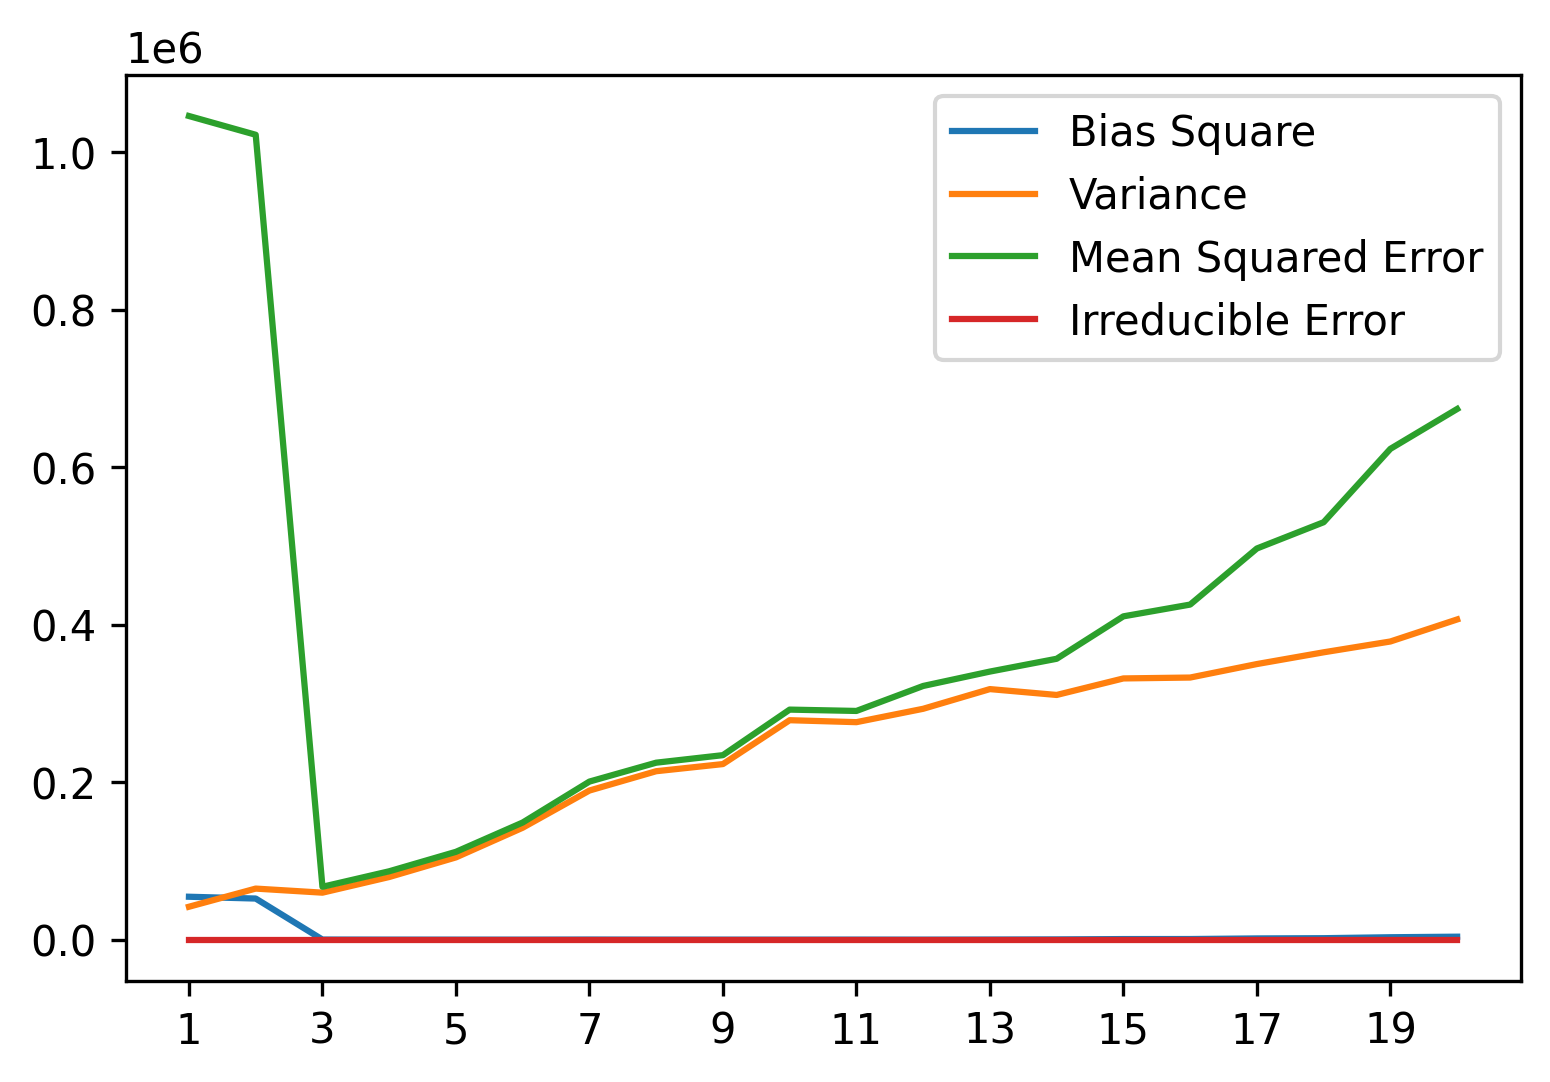

In [28]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.dpi']=300
plt.figure().patch.set_facecolor("white")
plt.xticks(np.array(range(1,21,2)))
plt.plot(np.array(range(1,21)),table["Bias Square"].tolist(),label="Bias Square")
plt.plot(np.array(range(1,21)),table["Variance"].tolist(),label="Variance")
plt.plot(np.array(range(1,21)),table["Mean Squared Error"].tolist(), label="Mean Squared Error")
plt.plot(np.array(range(1,21)),table["Irreducible Error"].tolist(), label="Irreducible Error")
plt.legend()
plt.show()

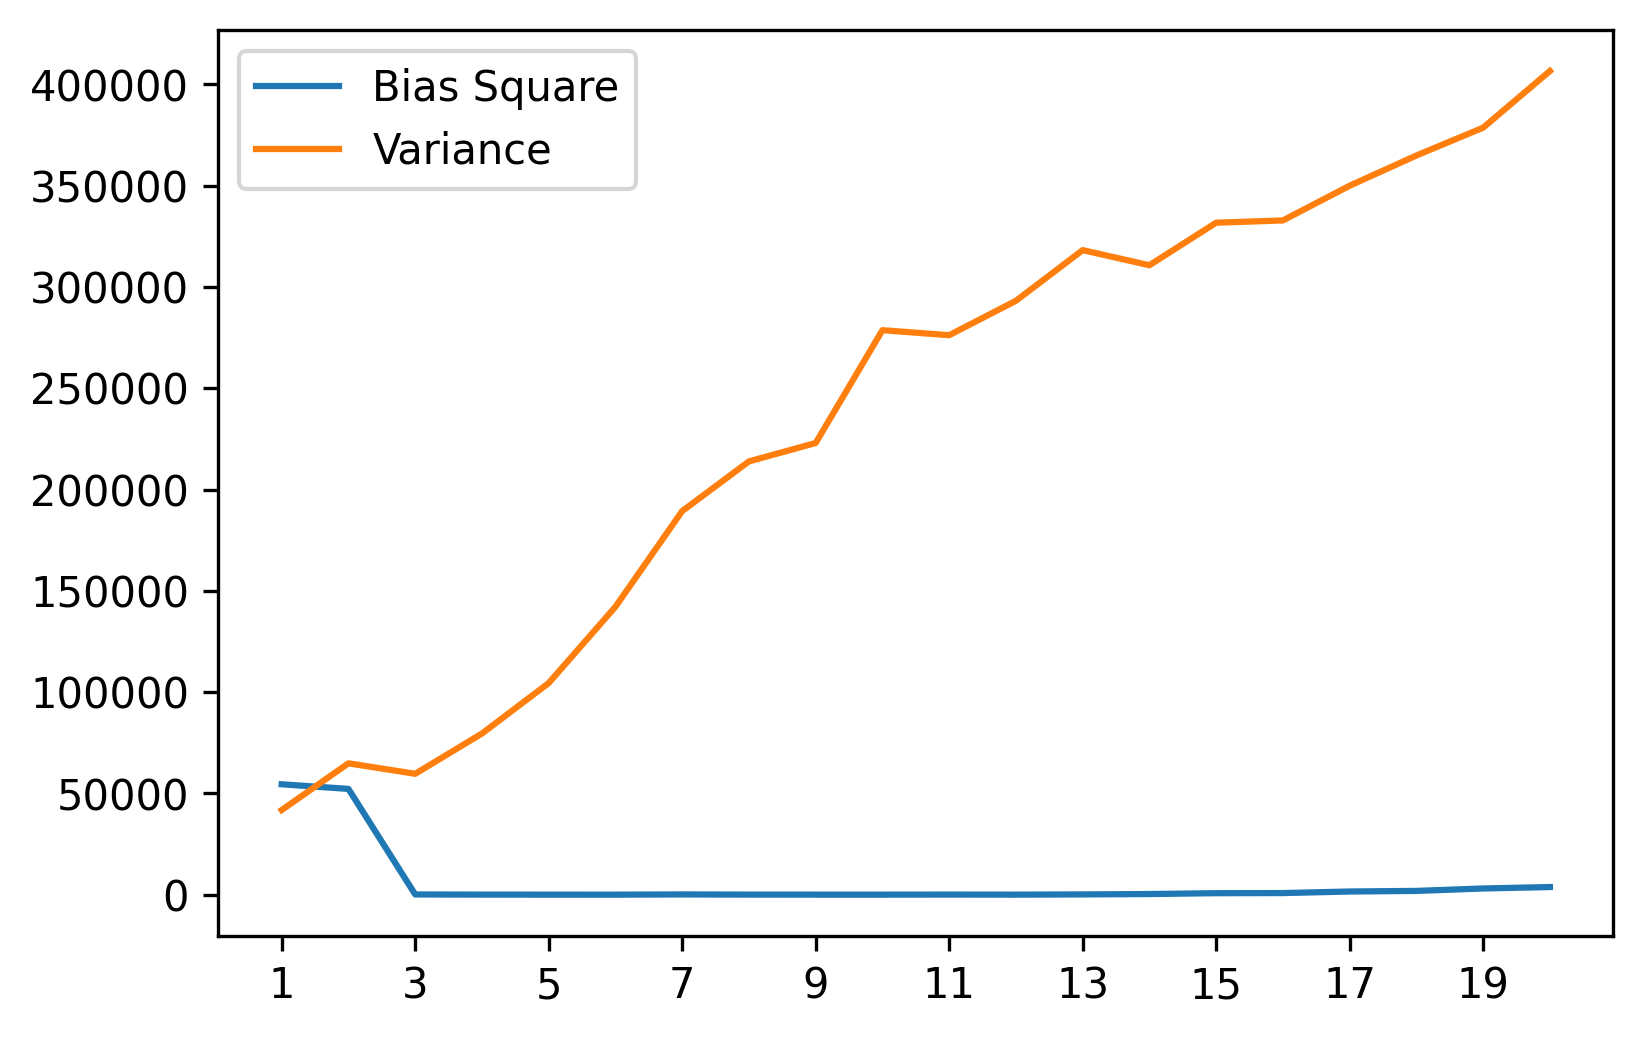

In [30]:
mpl.rcParams['figure.dpi']=300
plt.figure().patch.set_facecolor("white")
plt.xticks(np.array(range(1,21,2)))
plt.plot(np.array(range(1,21)),table["Bias Square"].tolist(),label="Bias Square")
plt.legend()
plt.show()

In [ ]:
mpl.rcParams['figure.dpi']=300
plt.figure().patch.set_facecolor("white")
plt.xticks(np.array(range(1,21,2)))
plt.plot(np.array(range(1,21)),table["Variance"].tolist(),label="Variance")
plt.legend()
plt.show()